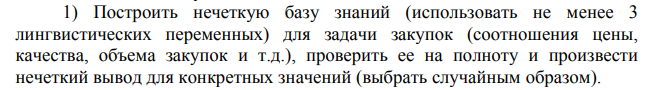

Воспользуемся данными из ЛР2


Рассмотрим закупку кирпичей строительными магазинами.

Зададим следующие правила:
- Если цена высокая - качество высокое
- Если цена средняя - качество среднее
- Если цена низкая - качество низкое


Для того чтобы система могла обрабатывать эти правила, надо задать функции принадлежности для нечетких подмножеств.

# Цена

Возьмем интервал цен за кирпич от 0 до 20, т.к. работать в убыток нет смысла, а цена более 20 неадекватна.

Посмотрев средние цены, можно утверждать, что:

- цена до 5 руб за кирпич **низкая**
- цена около 10 руб **средняя**
- цена более 15 руб **высокая**


В промежутке от 5 до 10 руб для низкой цены степень истинности лингвистической переменной линейно убывает, т. о. m_низкая(p)=1, при p=5 и m_низкая(p)=0, при p=10.
Соответственно для значений средней цены интервалы [5, 10] - линейное возрастание и [10, 15] - линейное убывание; для значений высокой цены [10, 15] - линейное возрастание.

Аналитически это выражается данными кусочными функциями принадлежности:

In [1]:
class price:
  def low(x):
    if 0 <= x <= 5:
      return 1
    if 5 <= x <= 10:
      return -0.2 * x + 2
    if 10 <= x:
      return 0

  def normal(x):
    if 0 <= x <= 5:
      return 0
    if 5 <= x <= 10:
      return 0.2 * x - 1
    if 10 <= x <= 15:
      return -0.2 * x + 3
    if 15 <= x:
      return 0

  def high(x):
    if 0 <= x <= 10:
      return 0
    if 10 <= x <= 15:
      return 0.2 * x - 2
    if 15 <= x:
      return 1

Нечеткие подмножества "низкая", "средняя", "высокая", определенные на
множестве значений цены.


In [2]:
import matplotlib.pyplot as plt

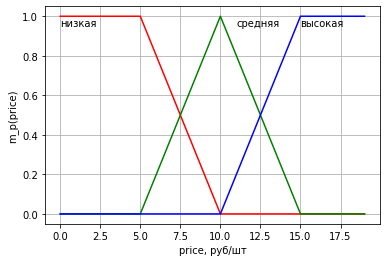

In [3]:
price_low = [price.low(i) for i in range(20)]
price_normal = [price.normal(i) for i in range(20)]
price_high = [price.high(i) for i in range(20)]

plt.plot(range(20), price_low, 'r')
plt.plot(range(20), price_normal, 'g')
plt.plot(range(20), price_high, 'b')

plt.ylabel("m_p(price)")
plt.xlabel("price, руб/шт")

plt.text(0, 0.95, 'низкая')
plt.text(11, 0.95, 'средняя')
plt.text(15, 0.95, 'высокая')

plt.grid()

Анализ

In [ ]:
for i in range(0, 20):
  if price_low[i] >= price_normal[i] and price_low[i] >= price_high[i]:
    print('Цена {} руб/шт низкая'.format(i))
  if price_normal[i] >= price_low[i] and price_normal[i] >= price_high[i]:
    print('Цена {} руб/шт средняя'.format(i))
  if price_high[i] >= price_normal[i] and price_high[i] >= price_low[i]:
    print('Цена {} руб/шт высокая'.format(i))

Цена 0 руб/шт низкая
Цена 1 руб/шт низкая
Цена 2 руб/шт низкая
Цена 3 руб/шт низкая
Цена 4 руб/шт низкая
Цена 5 руб/шт низкая
Цена 6 руб/шт низкая
Цена 7 руб/шт низкая
Цена 8 руб/шт средняя
Цена 9 руб/шт средняя
Цена 10 руб/шт средняя
Цена 11 руб/шт средняя
Цена 12 руб/шт средняя
Цена 13 руб/шт высокая
Цена 14 руб/шт высокая
Цена 15 руб/шт высокая
Цена 16 руб/шт высокая
Цена 17 руб/шт высокая
Цена 18 руб/шт высокая
Цена 19 руб/шт высокая


# Качество


Определим нечеткие подмножества для качества кирпичей в диапазоне от 0 до 5, где функции принадлежности "плохо", "нормально", "отлично" выражают субъективную оценку качества кирпича, выраженную данными кусочно-линейными функциями:

In [ ]:
class quality:
  def low(x):
    if 0 <= x <= 2:
      return 1
    if 2 <= x <= 3:
      return -x + 3
    if 3 <= x:
      return 0

  def normal(x):
    if 0 <= x <= 2:
      return 0
    if 2 <= x <= 3:
      return x - 2
    if 3 <= x <= 4:
      return 1
    if 4 <= x:
      return -x + 5

  def high(x):
    if 0 <= x <= 3:
      return 0
    if 3 <= x <= 4:
      return x - 3
    if 4 <= x:
      return 1

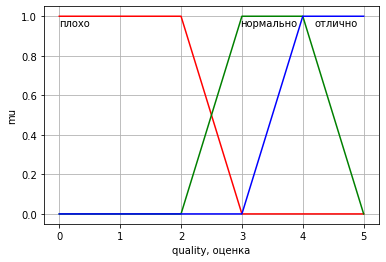

In [ ]:
quality_low = [quality.low(i) for i in np.linspace(0, 5, 11)]
quality_normal = [quality.normal(i) for i in np.linspace(0, 5, 11)]
quality_high = [quality.high(i) for i in np.linspace(0, 5, 11)]

plt.plot(np.linspace(0, 5, 11), quality_low, 'r')
plt.plot(np.linspace(0, 5, 11), quality_normal, 'g')
plt.plot(np.linspace(0, 5, 11), quality_high, 'b')

plt.ylabel("mu")
plt.xlabel("quality, оценка")

plt.text(0, 0.95, 'плохо')
plt.text(2.97, 0.95, 'нормально')
plt.text(4.2, 0.95, 'отлично')

plt.grid()

Возьмем степень вхождения при 7 руб за шт:

In [ ]:
m_p_high = price.high(7)
m_p_normal = price.normal(7)
m_p_low = price.low(7)

print(m_p_low)
print(m_p_normal)
print(m_p_high)

0.5999999999999999
0.40000000000000013
0


Модификация нечетких подмножеств


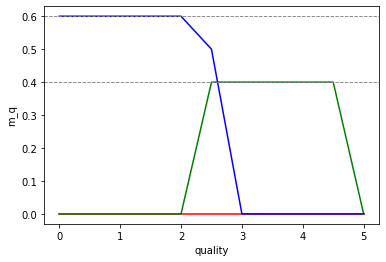

In [ ]:
m_q_high = []
m_q_normal = []
m_q_low = []

for i in np.linspace(0, 5, 11):
  if quality.high(i) <= m_p_high:
    m_q_high.append(quality.high(i))
  else: m_q_high.append(m_p_high)

for i in np.linspace(0, 5, 11):
  if quality.normal(i) <= m_p_normal:
    m_q_normal.append(quality.normal(i))
  else: m_q_normal.append(m_p_normal)

for i in np.linspace(0, 5, 11):
  if quality.low(i) <= m_p_low:
    m_q_low.append(quality.low(i))
  else: m_q_low.append(m_p_low)

plt.plot(np.linspace(0, 5, 11), m_q_high, 'r')
plt.plot(np.linspace(0, 5, 11), m_q_normal, 'g')
plt.plot(np.linspace(0, 5, 11), m_q_low, 'b')

plt.ylabel('m_q')
plt.xlabel('quality')

plt.axhline(m_p_normal, linestyle='--', color='gray', linewidth=0.9)
plt.axhline(m_p_low, linestyle='--', color='gray', linewidth=0.9)

In [ ]:
pip install scikit-fuzzy

In [ ]:
import skfuzzy as f
import numpy as np

In [ ]:
max_qual = f.fuzzy_or(np.array(range(0, 6)), m_q_normal, np.array(range(0, 6)), m_q_low)[1]

Результат обобщения всех правил выхода и скаляризация.

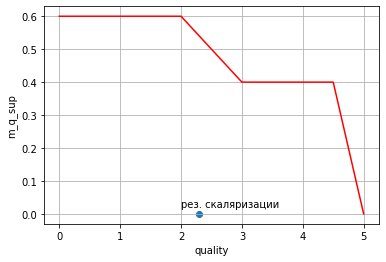

In [ ]:
plt.plot(np.linspace(0, 5, 11), max_qual, 'r')
plt.ylabel('m_q_sup')
plt.xlabel('quality')
plt.scatter(S, 0) #Выполнить после нахождения S
plt.text(2, 0.02, 'рез. скаляризации')
plt.grid()

In [ ]:
S = max_qual[0] * 2 + max_qual[3] * 2 + max_qual[3] / 2 + (max_qual[0] - max_qual[3]) / 2
S #ЦЕНТР ТЯЖЕСТИ

2.3

**Вывод.**
  Центр тяжести отмечен на рисунке, это значение качества выдаст экспертная система при цене за шт = 7 руб. При иных значениях цены функция принадлежности обобщенного результата выполнения всех правил будет
меняться.